# Homework 2 - Classification

In this exercise you will use scikit-learn, a popular machine learning package in python to train and tune a classifier. A particularly useful feature is that all classifiers (and linear models) are called using the same API, so it is easy to test between different models (see the sklearn-intro notebook for examples). So in this exercise we will a classification technique (logistic regression) that is representative of methods and challenges you will encounter when using any classification method.


## Dataset 1
The dataset you will be using is default of credit card clients Data Set.
There are two data files: "CreditDefault_training.csv" and "CreditDefault_Xtest.csv"
Both files have the following fields, except the label ("default.payment.next.month") which is not available in "CreditDefault_Xtest.csv"

Features:

1 - LIMIT_BAL:  Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. <br>
2 - SEX: (1 = male; 2 = female) <br>
3- EDUCATION: (six levels: 1,2,3,4,5,6) <br>
4 - MARRIAGE: (1 = married; 2 = single; 3 = others) <br>
5 - AGE <br>

From "PAY_1" to "PAY_6": History of past payment (Repayment status: -2: Balance paid in full and no transactions this period; -1: Balance paid in full, but account has a positive balance at end of period due to recent transactions for which payment has not yet come due; 0: Customer paid the minimum due amount, but not the entire balance; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.)<br>
6 - PAY_1: the repayment status in September, 2005 <br>
7 - PAY_2: the repayment status in August, 2005 <br>
...<br>
11 - PAY_6: the repayment status in April, 2005 <br>

From "BILL_AMT1" to "BILL_AMT6": Amount of bill statement (NT dollar).<br>
12 - BILL_AMT1 : amount of bill statement in September, 2005<br>
13 - BILL_AMT2 : amount of bill statement in August, 2005<br>
...<br>
17 - BILL_AMT6 : amount of bill statement in April, 2005<br>

From "PAY_AMT1" to "PAY_AMT6": Amount of previous payment (NT dollar).<br>
18 - PAY_AMT1 : amount paid in September, 2005<br>
19 - PAY_AMT2 : amount paid in August, 2005<br>
...<br>
23 - PAY_AMT6 : amount paid in April, 2005<br>

Target:

default.payment.next.month: binary variable, whether default payment (Yes = 1, No = 0)


Training dataset, "CreditDefault_training.csv", contains 3985 rows and 24 columns. This is the training set containing both of the features and the target.
Test dataset, "CreditDefault_Xtest.csv", contains 1000 rows and 23 columns. This is the test set which only contains the features.

Prediction task is to determine whether there's credit default for a person.



In [1]:
import numpy as np
import pandas as pd
from google.colab import files
import io

In [3]:
# Load your training data set
from google.colab import files

uploaded = files.upload()

# Training data
df_training = pd.read_csv(io.BytesIO(uploaded['CreditDefault_training (2).csv']))
df_training.head()

Saving CreditDefault_training.csv to CreditDefault_training (2).csv


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,50000,2,2,2,24,-1,-1,-1,-1,0,...,6561,5091,353,1572,1572,6561,102,353,27000,0
1,70000,2,2,2,24,0,0,0,0,0,...,64733,66680,71243,3000,3000,2500,3000,5800,0,0
2,420000,1,1,1,43,-2,-2,-2,-2,-2,...,2846,3027,5946,14274,8232,2853,3027,5946,32053,0
3,30000,1,2,3,53,1,-2,-1,2,0,...,3825,3825,0,0,4070,0,0,0,0,1
4,50000,2,2,1,49,1,2,2,2,0,...,21951,22287,22778,1000,3321,0,1000,1000,1001,0


In [4]:
# Checking null values
df_training.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [5]:
# Split training data into X and y
df_training_y = df_training['default.payment.next.month']
df_training_xs = df_training.drop('default.payment.next.month', axis=1)

## Standardization and One-hot Encoding

Standardize the continuous features and convert categorical variables ('SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6') into dummy variables.<br>
Note the situation where not all repayment status categories (-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9) necessarily appear in the training dataset for variables 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'.

Standardization and one-hot encoding for training set and test set

***First, we are going to upload the test data***

In [8]:
# Load test data set
from google.colab import files
uploaded = files.upload()

df_test = pd.read_csv(io.BytesIO(uploaded['CreditDefault_Xtest (3).csv']))
df_test.head()

Saving CreditDefault_Xtest.csv to CreditDefault_Xtest (3).csv


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,80000,1,6,1,41,0,0,0,0,0,...,133017,19164,3272,11766,4351,3520,1000,3272,11766,1740
1,50000,1,1,2,35,0,0,0,0,0,...,18188,18397,18161,18383,1565,7240,795,1000,673,647
2,80000,2,1,1,42,2,2,2,2,2,...,20471,20638,21003,20529,1600,1700,800,1000,0,2000
3,160000,2,2,2,27,0,0,0,0,0,...,80240,39835,41150,0,3600,3700,1700,2000,0,0
4,30000,1,1,1,30,0,0,0,0,0,...,14634,16378,16961,19669,3000,2000,2000,1000,3000,1000


In [9]:
# Checking null values
df_test.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64

***Now, standarization for training set***

In [10]:
from sklearn.preprocessing import StandardScaler
### WRITE CODE TO PERFORM Z-score Normalization ###
std_scaler = StandardScaler()

# Selecting numerical data in training dataset
df_training_numerical = df_training_xs[df_training_xs.columns.difference(['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])]

# Applying StandardScaler
training_numerical_x_scaled = std_scaler.fit_transform(df_training_numerical)

# Convert to DataFrame
numerical_scaled_training_x_df = pd.DataFrame(training_numerical_x_scaled, columns=df_training_numerical.columns)

***Now, standarization for test set***

In [11]:
# Selecting numerical data in test dataset
df_test_numerical = df_test[df_test.columns.difference(['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])]

# Applying StandardScaler
test_numerical_x_scaled = std_scaler.fit_transform(df_test_numerical)

# Convert to DataFrame
numerical_scaled_test_df = pd.DataFrame(test_numerical_x_scaled, columns=df_test_numerical.columns)

***Now, One hot encoding for training set***

In [12]:
from sklearn.preprocessing import OneHotEncoder

# Selecting categorical data
categorical_data_training = df_training_xs[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

# Applying OneHotEncoder
encoder = OneHotEncoder(sparse=False)
categorical_encoded_training = encoder.fit_transform(categorical_data_training)

# Convert to DataFrame
categorical_encoded_training_df = pd.DataFrame(categorical_encoded_training, columns=encoder.get_feature_names_out(categorical_data_training.columns))

# Display the first few rows of the encoded dataframe
print(categorical_encoded_training_df.head())

   SEX_1  SEX_2  EDUCATION_1  EDUCATION_2  EDUCATION_3  EDUCATION_4  \
0    0.0    1.0          0.0          1.0          0.0          0.0   
1    0.0    1.0          0.0          1.0          0.0          0.0   
2    1.0    0.0          1.0          0.0          0.0          0.0   
3    1.0    0.0          0.0          1.0          0.0          0.0   
4    0.0    1.0          0.0          1.0          0.0          0.0   

   EDUCATION_5  EDUCATION_6  MARRIAGE_1  MARRIAGE_2  ...  PAY_5_7  PAY_6_-2  \
0          0.0          0.0         0.0         1.0  ...      0.0       0.0   
1          0.0          0.0         0.0         1.0  ...      0.0       0.0   
2          0.0          0.0         1.0         0.0  ...      0.0       1.0   
3          0.0          0.0         0.0         0.0  ...      0.0       0.0   
4          0.0          0.0         1.0         0.0  ...      0.0       0.0   

   PAY_6_-1  PAY_6_0  PAY_6_2  PAY_6_3  PAY_6_4  PAY_6_5  PAY_6_6  PAY_6_7  
0       1.0      0.0 

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


***Now, One hot encoding for test set***

In [13]:
# Selecting categorical data
categorical_data_test = df_test[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

# Applying OneHotEncoder
encoder = OneHotEncoder(sparse=False)
categorical_encoded_test = encoder.fit_transform(categorical_data_test)

# Convert to DataFrame
categorical_encoded_test_df = pd.DataFrame(categorical_encoded_test, columns=encoder.get_feature_names_out(categorical_data_test.columns))

# Display the first few rows of the encoded dataframe
print(categorical_encoded_test_df.head())

   SEX_1  SEX_2  EDUCATION_1  EDUCATION_2  EDUCATION_3  EDUCATION_4  \
0    1.0    0.0          0.0          0.0          0.0          0.0   
1    1.0    0.0          1.0          0.0          0.0          0.0   
2    0.0    1.0          1.0          0.0          0.0          0.0   
3    0.0    1.0          0.0          1.0          0.0          0.0   
4    1.0    0.0          1.0          0.0          0.0          0.0   

   EDUCATION_5  EDUCATION_6  MARRIAGE_1  MARRIAGE_2  ...  PAY_5_2  PAY_5_3  \
0          0.0          1.0         1.0         0.0  ...      0.0      0.0   
1          0.0          0.0         0.0         1.0  ...      0.0      0.0   
2          0.0          0.0         1.0         0.0  ...      1.0      0.0   
3          0.0          0.0         0.0         1.0  ...      0.0      0.0   
4          0.0          0.0         1.0         0.0  ...      0.0      0.0   

   PAY_5_4  PAY_5_5  PAY_6_-2  PAY_6_-1  PAY_6_0  PAY_6_2  PAY_6_3  PAY_6_4  
0      0.0      0.0       

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


***Now, we will marge the training data set***

In [14]:
#Marge the training data to have everything on one place
categorical_encoded_training_df
numerical_scaled_training_x_df

# Resetting index to align the dataframes before combining
categorical_encoded_training_df.reset_index(drop=True, inplace=True)
numerical_scaled_training_x_df.reset_index(drop=True, inplace=True)

# Combining encoded categorical data and scaled numerical data
combined_df_x_training = pd.concat([numerical_scaled_training_x_df, categorical_encoded_training_df], axis=1)

# Display the first few rows of the combined dataframe
print(combined_df_x_training.columns)

Index(['AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'LIMIT_BAL', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_1', 'SEX_2', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5',
       'EDUCATION_6', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'PAY_1_-2',
       'PAY_1_-1', 'PAY_1_0', 'PAY_1_1', 'PAY_1_2', 'PAY_1_3', 'PAY_1_4',
       'PAY_1_5', 'PAY_1_6', 'PAY_1_7', 'PAY_1_8', 'PAY_2_-2', 'PAY_2_-1',
       'PAY_2_0', 'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5',
       'PAY_2_6', 'PAY_2_7', 'PAY_3_-2', 'PAY_3_-1', 'PAY_3_0', 'PAY_3_2',
       'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8',
       'PAY_4_-2', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4',
       'PAY_4_5', 'PAY_4_7', 'PAY_5_-2', 'PAY_5_-1', 'PAY_5_0', 'PAY_5_2',
       'PAY_5_3', 'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7', 'PAY_6_-2',
       'PAY_6_-1', 'PAY_6_0', 'PAY_6_2'

***Now, we will marge the test data set***

In [15]:
#Marge the test data to have everything on one place
numerical_scaled_test_df
categorical_encoded_test_df

# Resetting index to align the dataframes before combining
categorical_encoded_test_df.reset_index(drop=True, inplace=True)
numerical_scaled_test_df.reset_index(drop=True, inplace=True)

# Combining encoded categorical data and scaled numerical data
combined_df_test = pd.concat([numerical_scaled_test_df, categorical_encoded_test_df], axis=1)

# Display the first few rows of the combined dataframe
print(combined_df_test.columns)

Index(['AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
       'BILL_AMT6', 'LIMIT_BAL', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_1', 'SEX_2', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5',
       'EDUCATION_6', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'PAY_1_-2',
       'PAY_1_-1', 'PAY_1_0', 'PAY_1_1', 'PAY_1_2', 'PAY_1_3', 'PAY_1_4',
       'PAY_1_5', 'PAY_1_8', 'PAY_2_-2', 'PAY_2_-1', 'PAY_2_0', 'PAY_2_1',
       'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_6', 'PAY_2_7', 'PAY_3_-2',
       'PAY_3_-1', 'PAY_3_0', 'PAY_3_2', 'PAY_3_3', 'PAY_3_4', 'PAY_3_5',
       'PAY_3_6', 'PAY_4_-2', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_2', 'PAY_4_3',
       'PAY_4_4', 'PAY_4_5', 'PAY_5_-2', 'PAY_5_-1', 'PAY_5_0', 'PAY_5_2',
       'PAY_5_3', 'PAY_5_4', 'PAY_5_5', 'PAY_6_-2', 'PAY_6_-1', 'PAY_6_0',
       'PAY_6_2', 'PAY_6_3', 'PAY_6_4'],
      dtype='object')


***Now, we will check if the total columns in the training set are equal to the test set. If not, we are going to fix it with a function that checks total columns and add the missing ones in the test set with value = 0***

In [16]:
print(combined_df_test.shape[1] == combined_df_x_training.shape[1])

False


In [17]:
def checking_columns(df1, df2):
  for column in df1.columns:
      # Check if the column is missing in df2
      if column not in df2.columns:
          # Find the position of the column in df1
          position = df1.columns.get_loc(column)
          # Add the missing column to df2 with values set to 0 in the same position
          df2.insert(position, column, 0)

In [18]:
checking_columns(combined_df_x_training, combined_df_test)

In [19]:
print(combined_df_test.shape[1] == combined_df_x_training.shape[1])

True


**Splitting training data into training and validation set (70:30 ratio) (the code has been provided)**

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(combined_df_x_training, df_training_y, test_size=0.3, random_state=42)

Print the shape of X_train, y_train, X_val, y_val

In [21]:
print("Shape of the  X_train:", X_train.shape)
print("Shape of the y_train:", y_train.shape)
print("Shape of the X_val:", X_val.shape)
print("Shape of the y_val:", y_val.shape)
print("Shape of the test set:", combined_df_test.shape)

Shape of the  X_train: (2789, 82)
Shape of the y_train: (2789,)
Shape of the X_val: (1196, 82)
Shape of the y_val: (1196,)
Shape of the test set: (1000, 82)


## Logistic Regression

As previously mentioned, the scikit-learn classification API makes it easy to train a classifier.


Use LogisticRegression from sklearn.linear_model to make a logistic regression classifier.

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
# First, initialize the classifier with default parameters
# then fit the classifier on training data and labels

### WRITE CODE HERE ###
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
# If there is any ConvergenceWarning, increase the number of iterations. (Let max_iter = 200)
### WRITE CODE HERE ###
classifier = LogisticRegression(max_iter= 200)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200)

Implement my_precision(), my_recall(), my_accuracy() by yourselves

In [26]:
def my_precision(y_validation, y_preds): #TP/(TP+FP)
    TP = sum((y_preds == 1) & (y_validation == 1))
    TN = sum((y_preds == 0) & (y_validation == 0))
    FP = sum((y_preds == 1) & (y_validation == 0))
    FN = sum((y_preds == 0) & (y_validation == 1))
    if TP + FP == 0:
      return 0
    return(print("Precision:", round(TP/(TP + FP), 4)))

def my_recall(y_validation, y_preds): #TP/(TP+FN)
    TP = sum((y_preds == 1) & (y_validation == 1))
    TN = sum((y_preds == 0) & (y_validation == 0))
    FP = sum((y_preds == 1) & (y_validation == 0))
    FN = sum((y_preds == 0) & (y_validation == 1))
    if TP + FN == 0:
      return 0
    return(print("Recall:", round(TP/(TP+FN), 4)))

def my_accuracy(y_validation, y_preds): #(TP+TN)/(TP+FP+FN+TN)
    TP = sum((y_preds == 1) & (y_validation == 1))
    TN = sum((y_preds == 0) & (y_validation == 0))
    FP = sum((y_preds == 1) & (y_validation == 0))
    FN = sum((y_preds == 0) & (y_validation == 1))
    if TP + FP + FN + TN == 0:
      return 0
    return(print("Accuracy:",round((TP + TN)/(TP + TN + FN + FP), 4)))

Use your above functions to compute precision, recall, and accuracy of your model on validation set:

In [27]:
### WRITE CODE HERE
# predict the output for validation dataset
y_val_pred = classifier.predict(X_val)
my_accuracy(y_val, y_val_pred)
my_precision(y_val, y_val_pred)
my_recall(y_val, y_val_pred)

Accuracy: 0.8219
Precision: 0.661
Recall: 0.4333


Q. Accuracy<br>
Ans - 0.8219

Q. Precision<br>
Ans - 0.6610

Q. Recall<br>
Ans - 0.4333

Q. Which metric (accuracy, precision, recall) is more appropriate and in what cases? Will there be scenarios where it is better to use precision than accuracy? Explain. <br>
Ans - The best choice for metric would depend on the distribution within the dataset and the particular use case for which it is being used. Accuracy is more appropriate to measure general balanced classes. Precision can be used when the cost of false positive is high. Recall is more preferable when the cost of false negative is high.

Yes, there can be cases where precision can be better than accuracy because if the primary objective is to make sure that the positive predictions (predictions of default) are mostly true, then focusing on increasing precision would be ideal.

Q. Which metric is suitable in this case? <br>
Ans - We think recall would make the most sense here, because predicting that someone would default when they actually default would be extremely critical while extending loans. Missing out on potential cases of default could be very costly while extending loans, more so than predicting that someone would default even when they do not actually default. We believe that a stricter criteria to extend loans makes more sense in these scenarios. The error of misclassifying a default as no default would be more costly than the error of incorrectly classifying a non-default as default.

### ROC curve

Use roc_Curve from sklearn.metrics and use matplotlib.pyplot to plot the ROC curve. Use validation set to make predictions and to draw ROC curve.

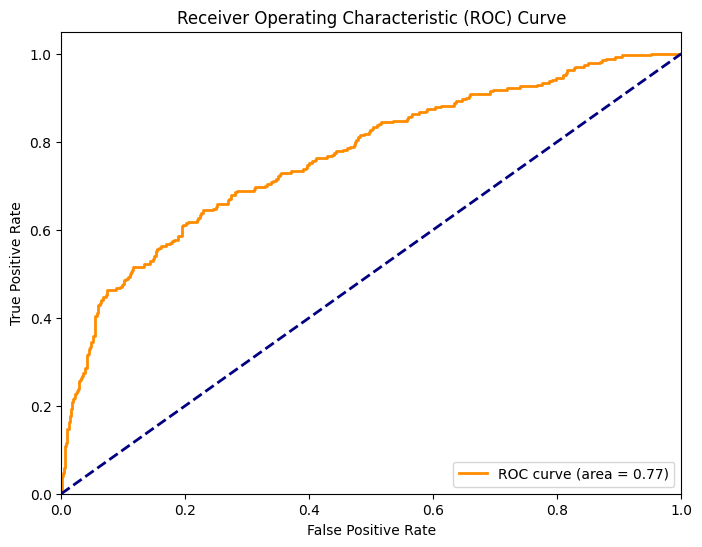

In [28]:
# Plot the ROC curve by giving appropriate names for title and axes.
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_proba = classifier.predict_proba(X_val)[:, 1]

# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Q. What is the AUC obtained?<br>
Ans - The AUC is 0.77, indicating that the model has a reasonable ability to distinguish between classes and performs considerably better than the "null" model (i.e., the one that just predicts the mean value without considering any predictor variables). We can improve its performance by gathering more data or tuning hyperparameters.

***We check the ROC in the training data set to see if we are overfitting***

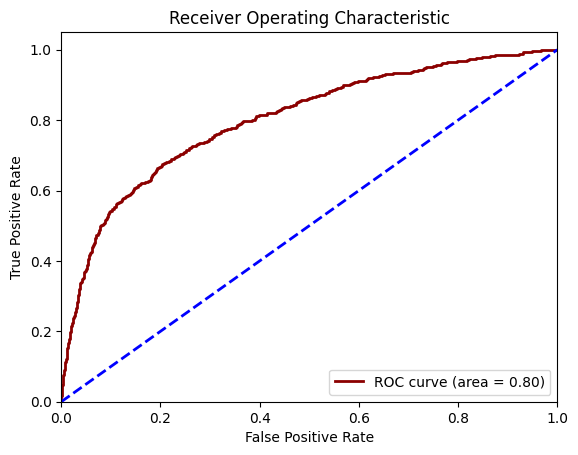

In [29]:
y_pred_proba = classifier.predict_proba(X_train)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkred', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [30]:
y_train_pred = classifier.predict(X_train)
my_accuracy(y_train, y_train_pred)
my_precision(y_train, y_train_pred)
my_recall(y_train, y_train_pred)

Accuracy: 0.8175
Precision: 0.689
Recall: 0.3954


After checking the ROC curve and "precision, recall and accuracy" of the training data set, we can determine that the variation between the training and the validation data set is marginal. Therefore, this is a great indicator that we are not overfitting the training data set.

## Hyperparameters

"Model tuning" refers to model adjustments to better fit the data, which is separate from "fitting" or "training" the model.


Build a model with hyperparameter 'C' set to 0.1 and penalty set to 'l1'. Make predictions on validation set and compute accuracy, precision and recall.

In [31]:
### WRITE CODE HERE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid to search
param_grid = {
    'penalty': ['l1'],  # Regularization types
    'C': [0.1],  # Regularization strength
    'solver': ['liblinear', 'saga']  # Solvers that support both l1 and l2 penalties
}

# Initialize GridSearchCV with the classifier, parameter grid, and desired performance metric
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_val)

# Get the best parameters and score found by GridSearchCV
best_params = grid_search.best_params_
best_score = grid_search.best_score_

my_accuracy(y_val, y_pred)
my_precision(y_val, y_pred)
my_recall(y_val, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.8253
Precision: 0.6805
Recall: 0.4259


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Build a model with hyperparameter 'C' set to 0.5 and penalty set to 'l1'. Make predictions on validation set and compute accuracy, precision and recall.

In [32]:
# Define the parameter grid to search
param_grid = {
    'penalty': ['l1'],  # Regularization types
    'C': [0.5],  # Regularization strength
    'solver': ['liblinear', 'saga']  # Solvers that support both l1 and l2 penalties
}

# Initialize GridSearchCV with the classifier, parameter grid, and desired performance metric
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_val)

# Get the best parameters and score found by GridSearchCV
best_params = grid_search.best_params_
best_score = grid_search.best_score_

my_accuracy(y_val, y_pred)
my_precision(y_val, y_pred)
my_recall(y_val, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.8236
Precision: 0.6686
Recall: 0.4333


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Build a model with hyperparameter 'C' set to 0.1 and penalty set to 'l2'. Make predictions on validation set and compute accuracy, precision and recall.

In [33]:
### WRITE CODE HERE
param_grid = {
    'penalty': ['l2'],  # Regularization types
    'C': [0.1],  # Regularization strength
    'solver': ['liblinear', 'saga']  # Solvers that support both l1 and l2 penalties
}

# Initialize GridSearchCV with the classifier, parameter grid, and desired performance metric
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_val)

# Get the best parameters and score found by GridSearchCV
best_params = grid_search.best_params_
best_score = grid_search.best_score_

my_accuracy(y_val, y_pred)
my_precision(y_val, y_pred)
my_recall(y_val, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.8211
Precision: 0.6628
Recall: 0.4222


Build a model with hyperparameter 'C' set to 0.5 and penalty set to 'l2'. Make predictions on validation set and compute accuracy, precision and recall. (Try to use a different solver or increase the number of iterations if there is a ConvergenceWarning)

In [34]:
### WRITE CODE HERE
### WRITE CODE HERE
param_grid = {
    'penalty': ['l2'],  # Regularization types
    'C': [0.5],  # Regularization strength
    'solver': ['liblinear', 'saga']  # Solvers that support both l1 and l2 penalties
}

# Initialize GridSearchCV with the classifier, parameter grid, and desired performance metric
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_val)


my_accuracy(y_val, y_pred)
my_precision(y_val, y_pred)
my_recall(y_val, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.8227
Precision: 0.6648
Recall: 0.4333


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [35]:
# Define the parameter grid to search with more iterations to
param_grid = {
    'penalty': ['l1','l2'],  # Regularization types
    'C': [0.1, 0.5],  # Regularization strength
    'solver': ['liblinear', 'saga']  # Solvers that support both l1 and l2 penalties
}

# Initialize GridSearchCV with the classifier, parameter grid, and desired performance metric
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_val)

# Get the best parameters and score found by GridSearchCV
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)
my_accuracy(y_val, y_pred)
my_precision(y_val, y_pred)
my_recall(y_val, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best Parameters: {'C': 0.5, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.814984266712998
Accuracy: 0.8236
Precision: 0.6686
Recall: 0.4333


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Q. Which of the above models is better?<br>
Ans- If we use all the possibilities in the same param grid, we can identify that the best models is the one with 'C' = 0.5 and penalty 'l1' with 'solver'
 = 'liblinear' is the best option

# Test set

You have worked on training and validation dataset so far, but test data does not include the labels. Choose the best hyperparameter values as seen in previous section and build a model. Use this model to make predictions on test set.

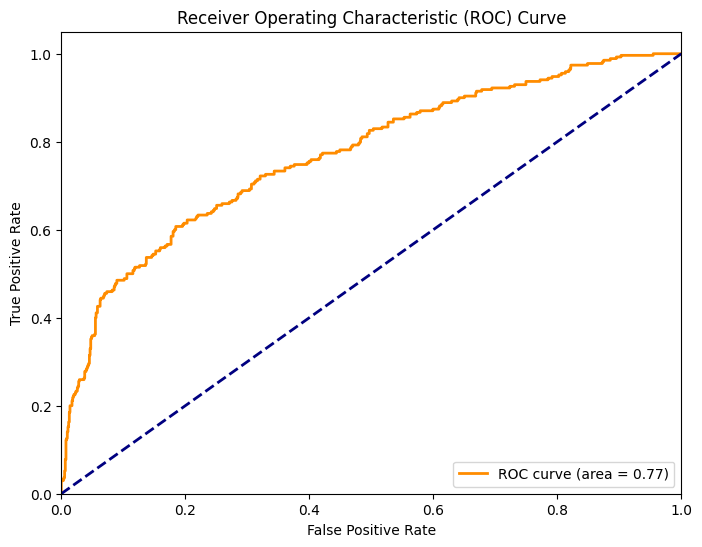

Accuracy: 0.8236
Precision: 0.6686
Recall: 0.4333


In [36]:
# Construct your final logistic regression using the best hyperparameters obtained above (C and penalty) ###
param_grid = {
    'penalty': ['l1'],  # Regularization types
    'C': [0.5],  # Regularization strength
    'solver': ['liblinear']
}

# Initialize GridSearchCV with the classifier, parameter grid, and desired performance metric
grid_search_final = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search_final.fit(X_train, y_train)

y_pred_proba = grid_search_final.predict_proba(X_val)[:, 1]

# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

y_pred = grid_search.predict(X_val)
my_accuracy(y_val, y_pred)
my_precision(y_val, y_pred)
my_recall(y_val, y_pred)

In [37]:
# Construct your final logistic regression using the best hyperparameters obtained above (C and penalty) ###
param_grid = {
    'penalty': ['l1'],  # Regularization types
    'C': [0.5],  # Regularization strength
    'solver': ['liblinear']
}

# Initialize GridSearchCV with the classifier, parameter grid, and desired performance metric
grid_search_final = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search_final.fit(X_train, y_train)

# return the prediction as "y_pred"
y_pred = grid_search_final.predict(combined_df_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

# Dataset 2
## Heart Disease Dataset Description

The Heart Disease Dataset contains a number of variables that can be used to predict the presence of heart disease in patients. Each attribute potentially contributes information that could be used to determine heart disease risk.

### Dataset Features:

- **Age**: The patient's age in years.
- **Sex**: The patient's sex (1 = male, 0 = female).
- **Chest Pain Type**: Type of chest pain experienced (values ranging from 1 to 4).
- **Resting Blood Pressure**: Resting blood pressure in mm Hg on admission to the hospital.
- **Serum Cholestrol**: Serum cholesterol in mg/dl.
- **Fasting Blood Sugar**: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false).
- **Resting Electrocardiographic Results**: Resting electrocardiographic results (values 0, 1, 2).
- **Maximum Heart Rate Achieved**: Maximum heart rate achieved during thallium stress test.
- **Exercise Induced Angina**: Exercise-induced angina (1 = yes; 0 = no).
- **ST Depression**: ST depression induced by exercise relative to rest.
- **Slope of the Peak Exercise ST Segment**: The slope of the peak exercise ST segment.
- **Number of Major Vessels**: Number of major vessels colored by fluoroscopy (0-3).
- **Thal**: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect).

### Target Variable:

- **Heart Disease Presence**: The presence of heart disease (0 = no, 1 = yes).




In [38]:
# Load the data set
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo
import pandas as pd

# Fetch dataset
heart_disease = fetch_ucirepo(id=45)

# Data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# Convert the target variable to binary
# 0 indicates no disease, 1 indicates any level of disease
y_binary = np.where(y == 0, 0, 1)
y_binary_series = pd.Series(y_binary.reshape(-1), name='HeartDisease')
# Now, X contains the features and y_binary contains the binary target
print(X.head())
print()
print(y_binary_series.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  
0  0.0   6.0  
1  3.0   3.0  
2  2.0   7.0  
3  0.0   3.0  
4  0.0   3.0  

0    0
1    1
2    1
3    0
4    0
Name: HeartDisease, dtype: int64


In [39]:
X.shape

(303, 13)

In [40]:
# Handling missing values (ex- by removing rows with missing data)
filter = X.isna().any(axis = 1)
index = X[filter].index

X_clean = X.drop(index)
X_clean.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
292,44,1,4,120,169,0,0,144,1,2.8,3,0.0,6.0
293,63,1,4,140,187,0,2,144,1,4.0,1,2.0,7.0
294,63,0,4,124,197,0,0,136,1,0.0,2,0.0,3.0
295,41,1,2,120,157,0,0,182,0,0.0,1,0.0,3.0
296,59,1,4,164,176,1,2,90,0,1.0,2,2.0,6.0
297,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0


In [41]:
X_clean.shape

(297, 13)

In [42]:
# Since 'y' (targets) do not have missing values, they can be used as is
# However, ensure that the rows in 'y' correspond to the rows in the cleaned 'X'
Y_clean = y_binary_series.drop(index)
Y_clean.tail(10)

292    1
293    1
294    1
295    0
296    1
297    1
298    1
299    1
300    1
301    1
Name: HeartDisease, dtype: int64

In [43]:
(X_clean.index == Y_clean.index).all()

True

Data preprocessing (Standardize the features, one-hot encoding, lable encoding)

In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [45]:
transformer = ColumnTransformer(
    transformers=[
        ('standardization', StandardScaler(), ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']),
        ('cat_onehot', OneHotEncoder(), ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']),
        ('cat_label', OrdinalEncoder(), ['ca'])
    ],
    remainder='passthrough'
)

X_transformed = transformer.fit_transform(X_clean)

# StandardScaler columns
new_column_names = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# OneHot Encoding columns
onehot_columns = transformer.named_transformers_['cat_onehot'].get_feature_names_out(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'])
new_column_names.extend(onehot_columns)

# Label Encoder columns
new_column_names += ['ca']

X_transformed_df = pd.DataFrame(X_transformed, columns=new_column_names)

# StandardScaler for column ca Label Encoding
scaler = StandardScaler()
X_ca = scaler.fit_transform(X_transformed_df[['ca']])
X_transformed_df['ca'] = X_ca
X_transformed_df

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_1,cp_2,cp_3,...,restecg_2,exang_0,exang_1,slope_1,slope_2,slope_3,thal_3.0,thal_6.0,thal_7.0,ca
0,0.936181,0.750380,-0.276443,0.017494,1.068965,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.721976
1,1.378929,1.596266,0.744555,-1.816334,0.381773,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2.478425
2,1.378929,-0.659431,-0.353500,-0.899420,1.326662,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.411625
3,-1.941680,-0.095506,0.051047,1.633010,2.099753,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-0.721976
4,-1.498933,-0.095506,-0.835103,0.978071,0.295874,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.721976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,0.272059,0.468418,-0.122330,-1.161395,-0.734914,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.721976
293,-1.056185,-1.223355,0.320744,-0.768432,0.124076,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.721976
294,1.489615,0.693988,-1.047008,-0.375469,2.013854,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.411625
295,0.272059,-0.095506,-2.241384,-1.510696,0.124076,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.344824


Splitting training data into training and validation set (the code has been provided)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_transformed_df, Y_clean, test_size = 0.3, random_state=20)

### Decision Tree
From sklearn.tree use DecisionTreeClassifier to build a classification model with default parameters.

In [47]:
from sklearn.tree import DecisionTreeClassifier
### Fit the classifier on the training data
# Please set random_state=30
### WRITE CODE HERE ###

dt = DecisionTreeClassifier(random_state=30)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=30)

In [48]:
### Make predictions on the training data

### WRITE CODE HERE ###

y_pred_train = dt.predict(X_train)

Print accuracy, precision and recall for the predictions made on the training data.

In [49]:
def my_precision(y, y_preds): #TP/(TP+FP)
    TP = sum((y == 1) & (y_preds == 1))
    FP = sum((y == 0) & (y_preds == 1))
    TN = sum((y == 0) & (y_preds == 0))
    FN = sum((y == 1) & (y_preds == 0))
    if TP + FP == 0:
        return 0
    return TP / (TP + FP)

def my_recall(y, y_preds): #TP/(TP+FN)
    TP = sum((y == 1) & (y_preds == 1))
    FP = sum((y == 0) & (y_preds == 1))
    TN = sum((y == 0) & (y_preds == 0))
    FN = sum((y == 1) & (y_preds == 0))
    if TP + FN == 0:
        return 0
    return (TP/(TP+FN))

def my_accuracy(y, y_preds): #(TP+TN)/(TP+FP+FN+TN)
    TP = sum((y == 1) & (y_preds == 1))
    FP = sum((y == 0) & (y_preds == 1))
    TN = sum((y == 0) & (y_preds == 0))
    FN = sum((y == 1) & (y_preds == 0))
    if TP + FP + FN + TN == 0:
        return 0
    return ((TP+TN)/(TP+FP+FN+TN))

In [50]:
# Print accuracy, precision and recall for the predictions made on the training data.

from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = my_accuracy(y_train, y_pred_train)
precision = my_precision(y_train, y_pred_train)
recall = my_recall(y_train, y_pred_train)

print(f"Accuracy on training data: {accuracy:.2f}")
print(f"Precision on training data: {precision:.2f}")
print(f"Recall on training data: {recall:.2f}")

Accuracy on training data: 1.00
Precision on training data: 1.00
Recall on training data: 1.00


In [51]:
### Make predictions on the validation data
### WRITE CODE HERE ###

y_pred_val = dt.predict(X_val)

Print accuracy, prediction and recall for the predictions made on the validation data.

In [52]:
### WRITE CODE HERE ###

accuracy = my_accuracy(y_val, y_pred_val)
precision = my_precision(y_val, y_pred_val)
recall = my_recall(y_val, y_pred_val)

print(f"Accuracy on validation data: {accuracy:.2f}")
print(f"Precision on validation data: {precision:.2f}")
print(f"Recall on validation data: {recall:.2f}")

Accuracy on validation data: 0.72
Precision on validation data: 0.66
Recall on validation data: 0.71


Plot ROC curve and obtain AUC for predictions on the validation data.

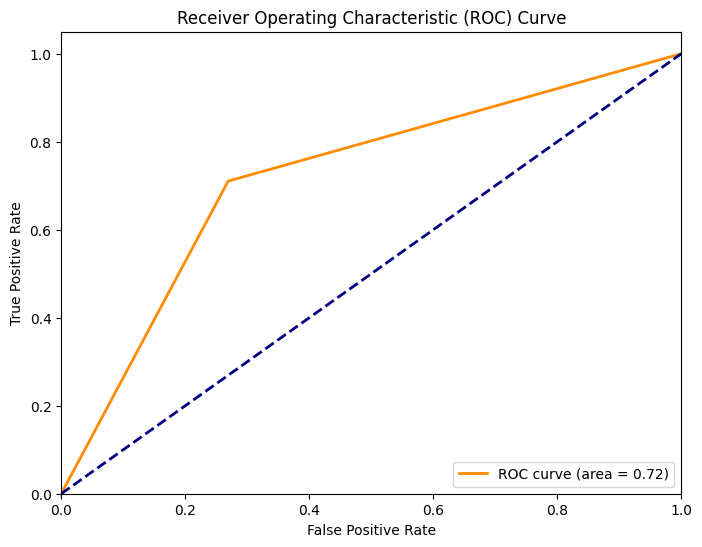

In [53]:
# Plot the ROC curve by giving appropriate names for title and axes.

### WRITE CODE HERE

from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

y_pred_proba = dt.predict_proba(X_val)[:, 1]

# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Q. Based on the scores for training set and validation set, explain the performance of the above model in terms of bias and variance.<br>

Ans - Based on the accuracy, precision and recall scores for the training set and validations sets respectively, the bias of the model is extremely low as it fits the training data perfectly but the variance is quite high as the model doesn't perform as well on the validation data. This is because the decision tree also fits the noise in the training set, due to which it overfits on the training set and its dependence is highly dependent on the training set. However, due to the high variance, it does not generalize too well on the test set.

### Random Forest


Decision Trees have low predictive power compared to other methods due to high variance. Random Forest increases prediction power at the expense of decreased interpretability.


From sklearn.ensemble use RandomForestClassifier to build a classification model with default parameters.

In [54]:
from sklearn.ensemble import RandomForestClassifier
### Fit the classifier on the training data
# Please set random_state=30
### WRITE CODE HERE ###
rf_model = RandomForestClassifier(random_state=30)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=30)

In [55]:
### Make predictions on the training data
### WRITE CODE HERE ###

y_pred_train = rf_model.predict(X_train)

Print accuracy, precision and recall for the predictions made on the training data.

In [56]:
accuracy_train = my_accuracy(y_train, y_pred_train)
precision_train = my_precision(y_train, y_pred_train)
recall_train = my_recall(y_train, y_pred_train)

print(f'Accuracy on training data: {accuracy_train : .2f}')
print(f'Precision on training data: {precision_train : .2f}')
print(f'Recall on training data: {recall_train : .2f}')

Accuracy on training data:  1.00
Precision on training data:  1.00
Recall on training data:  1.00


In [57]:
### Make predictions on the validation data

### WRITE CODE HERE ###

y_pred_val = rf_model.predict(X_val)

Print accuracy, prediction and recall for the predictions made on the validation data.

In [58]:
### WRITE CODE HERE ###

accuracy_val = my_accuracy(y_val, y_pred_val)
precision_val = my_precision(y_val, y_pred_val)
recall_val = my_recall(y_val, y_pred_val)

print(f'Accuracy on validation data: {accuracy_val : .2f}')
print(f'Precision on validation data: {precision_val : .2f}')
print(f'Recall on validation data: {recall_val : .2f}')

Accuracy on validation data:  0.81
Precision on validation data:  0.74
Recall on validation data:  0.84


Plot ROC curve and obtain AUC for the validation predictions

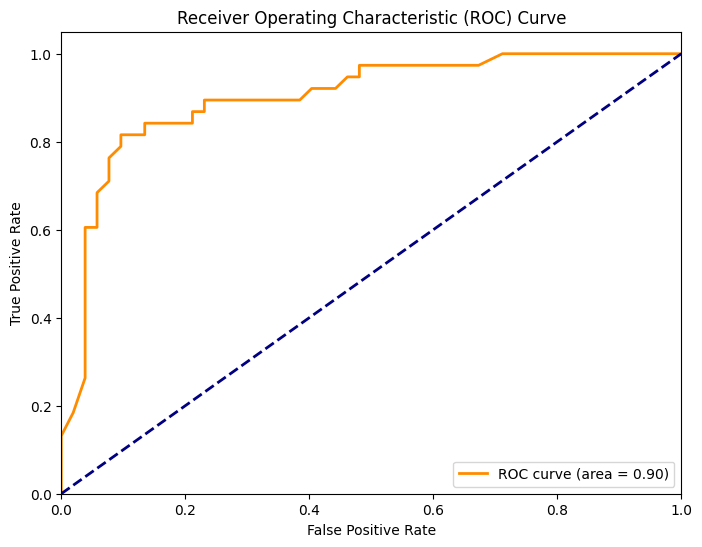

In [59]:
# Plot the ROC curve by giving appropriate names for title and axes.

### WRITE CODE HERE

from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics

y_pred_proba = rf_model.predict_proba(X_val)[:, 1]

# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Q. Based on the scores for training set and validation set, explain the performance of the above model in terms of bias and variance. Is the Random Forest model better or worse than the Decision Tree model? Explain why you think the performance may have improved or deteriorated.

Ans- Based on the accuracy, precision and recall scores for the training set and validations sets respectively, the bias of the model is extremely low similar to the decision tree and it also has relatively lower variance as it performs better on the validation set as well compared to the decision tree.

Overall the model performance of the random forest model is better than that of the decision tree model due to the following reasons:<br/>
1 - Random forest is an ensemble model so it aggregates the predictions from multiple trees. The aggregation leads to a much stronger learner than any of the individual learners. <br/>
2 - Bootstrapping of the training set with replacement leads to the generation of a new set of training examples, which is like picking independent samples from the population. This reduces the overall varianceof the model and it generalizes better to unseen datasets from the same population.<br/>
3 - The random forest model only picks a random subset of all the features for each split in a tree (by default the square root of the total number of features). This prevents the model from splitting on the same set of features across different trees due to the greedy nature of the algorithm, and causes the model to pick splits that it may not have picked if all features were available for all splits, which can lead to more optimal splits later on.

## Hyperparameters

"Model tuning" refers to model adjustments to better fit the data, which is separate from "fitting" or "training" the model.

There are aspects of some models that are user specified. For example, when using a random forest (which is basically an ensemble of decision trees), it is probably a good idea to choose the right number of underlying trees. Too many and the model might overfit, and too few and the model might not be able to properly learn the data. Parameters such as these are referred to as "hyperparameters" or "free parameters", as the values for these are determined by the user and not the algorithm.

A quick and efficient way to optimize hyperparameters is to perform Grid Search over different values of the parameters.

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
param_grid = {
    'max_depth': [1, 3, 6, 9, None],
    'max_features': ['sqrt', 'log2', None, 0.5],
    'min_samples_leaf': [1, 2, 4, 8],
    'min_samples_split': [2, 4, 10],
    'n_estimators': [25, 100, 200]
}

In [62]:
rf = RandomForestClassifier(random_state=30)

In [63]:
grid_search = GridSearchCV(estimator = rf, scoring='recall', param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

In [64]:
### Fit on the training data with all sets of parameters.
### WRITE CODE HERE ###

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=30), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 6, 9, None],
                         'max_features': ['sqrt', 'log2', None, 0.5],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 4, 10],
                         'n_estimators': [25, 100, 200]},
             scoring='recall', verbose=2)

Display the parameters of the best model.

In [65]:
# Print the best parameters
### WRITE CODE HERE ###
grid_search.best_params_

{'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 25}

In [66]:
# Print the best score
grid_search.best_score_

0.8282828282828283

In [68]:
### Using the best model, do the following:
### Make predictions on the training set and display accuracy, precision and recall.
### Make predictions on the validation set and display accuracy, precision and recall.
rf_best = RandomForestClassifier(max_depth=6,
                                 max_features='sqrt',
                                 min_samples_leaf=4,
                                 min_samples_split=2,
                                 n_estimators=25,
                                 random_state = 30)
rf_best.fit(X_train, y_train)

### Using the best model, do the following:
### Make predictions on the training set and display accuracy, precision and recall.
### WRITE CODE HERE ###
y_pred_train = rf_best.predict(X_train)
accuracy_train = my_accuracy(y_train, y_pred_train)
precision_train = my_precision(y_train, y_pred_train)
recall_train = my_recall(y_train, y_pred_train)

print(f'Accuracy on training data: {accuracy_train : .2f}')
print(f'Precision on training data: {precision_train : .2f}')
print(f'Recall on training data: {recall_train : .2f}')

### Make predictions on the validation set and display accuracy, precision and recall.
### WRITE CODE HERE ###
y_pred_val = rf_best.predict(X_val)
accuracy_val = my_accuracy(y_val, y_pred_val)
precision_val = my_precision(y_val, y_pred_val)
recall_val = my_recall(y_val, y_pred_val)

print(f'Accuracy on validation data: {accuracy_val : .2f}')
print(f'Precision on validation data: {precision_val : .2f}')
print(f'Recall on validation data: {recall_val : .2f}')

Accuracy on training data:  0.91
Precision on training data:  0.94
Recall on training data:  0.88
Accuracy on validation data:  0.84
Precision on validation data:  0.79
Recall on validation data:  0.87


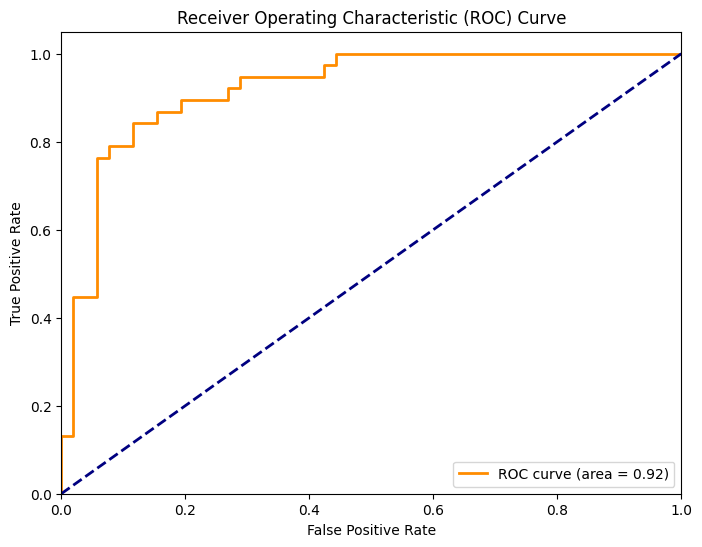

In [69]:
# Plot the ROC curve on validation set by giving appropriate names for title and axes.

### WRITE CODE HERE
y_pred_proba = rf_best.predict_proba(X_val)[:, 1]

# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Individual student contribution

We initially divided the group into 2 sub-groups to work on the two datasets separately.<br/>

Dataset 1: Facundo and Jessica <br/>
Dataset 2: Elena, Lizzie and Mrigangka <br/>

After the subgroups completed the modeling on the datasets separately, we went through both the datasets together and made updates and refinements as required. Overall, all the team-members contributed relatively equally throughout the assignment.
